In [19]:
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'C:\study\git\machine_learning\data\titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
# PassengerId : 탑승자 데이터 일련번호
# Survived : 생존 여부 / 0 = 사망, 1 = 생존
# Pclass : 티켓의 선실 등급 / 1 = 일등석, 2 = 이등석, 3 = 삼등석
# Name : 탑승자 이름
# Sex : 탑승자 성별
# Age : 탑승자 나이
# SibSp : 같이 탑승한 형제자매 또는 배우자 인원수
# Parch : 같이 탑승한 부모님 또는 어린이 인원수
# Ticket : 티켓 번호
# Fare : 요금
# Cabin : 선실 번호
# Embarked : 중간 정착 항구 / C = Cherbourg, Q = Quuenstown, S = Southampton

In [21]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [22]:
# 사이킷런 머신러닝 알고리즘은 Null값 허용 X
# Null 값 처리 필요
# DataFrame의 fillna() 사용

# Age의 경우, 평균 나이로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
# 나머지 칼럼은 'N'으로 변경
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

# print('데이터 세트 Null값 개수 : ', titanic_df.isnull().sum())
print('데이터 세트 Null값 개수 : ', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 :  0


In [23]:
print('Sex값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포 : 
 N                  687
B96 B98              4
C23 C25 C27          4
G6                   4
C22 C26              3
D                    3
F33                  3
F2                   3
E101                 3
B57 B59 B63 B66      2
C52                  2
E8                   2
F G73                2
B51 B53 B55          2
F4                   2
B28                  2
C83                  2
C68                  2
C92                  2
E67                  2
B35                  2
E24                  2
C125                 2
C93                  2
D35                  2
C124                 2
C126                 2
C65                  2
B58 B60              2
E33                  2
                  ... 
C106                 1
B37                  1
A31                  1
A14                  1
A7                   1
C62 C64              1
B41                  1
E17                  1
C101                 1
A

In [24]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [25]:
# 성별이 생존 확률에 어떤 영향을 미쳤는지
# 성별에 따른 생존자 수 비교
# Survived 칼럼은 레이블로서 결정 클래스 값
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

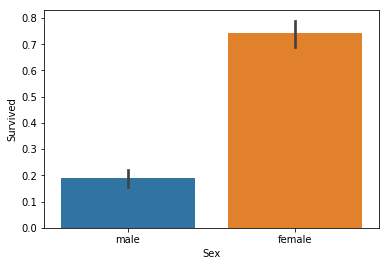

In [26]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

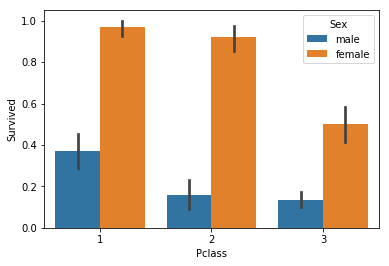

In [27]:
# 빈부에 따른 생존자 수 비교
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

In [28]:
# Age에 따른 생존 확률
# Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당

In [29]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
# DataFrame의 apply lambda 식에 사용
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

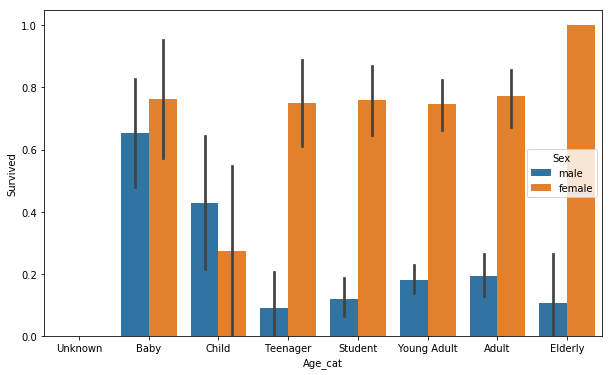

In [30]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10 ,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값을 지정
# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [ ]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [ ]:
# LabelEncoder 클래스를 이용해 레이블 인코딩을 적용
# LabelEncoder 객체는 
# 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 - 1)까지의 숫자 값으로 변환

In [31]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

In [32]:
titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [39]:
# 지금까지 피처를 가공한 내역을 정리, 쉽게 재사용할 수 있도록 함수화

from sklearn import preprocessing

# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [42]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv(r'C:\study\git\machine_learning\data\titanic_train.csv')

# 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해
# 클래스 결정값 데이터 세트로 만든다
y_titanic_df = titanic_df['Survived']

# Survived 속성을 드롭해 피처 데이터 세트를 만든다
X_titanic_df = titanic_df.drop('Survived', axis = 1) 

# 생성된 피처 데이터 세트에 transform_features()를 적용해 데이터를 가공한다
X_titanic_df = transform_features(X_titanic_df)

In [43]:
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [44]:
y_titanic_df.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [45]:
# 별도의 테스트 데이터 세트 추출 (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size = 0.2, random_state = 11)

#### ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측
- 결정 트리 : DecisionTreeClassifier 클래스
- 랜덤 포레스트 : RandomForestClassifier 클래스
- 로지스틱 회귀 : LogisticRegression 클래스

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8324
LogisticRegression 정확도 : 0.8659


In [49]:
# KFold 클래스를 이용해 교차 검증 수행

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5) :
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [50]:
# cross_val_score() API를 이용해 교차 검증 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv= 5)
for iter_count, accuracy in enumerate(scores) :
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

# StratifiedKFold를 이용해서 폴드 세트를 분할하기 때문에 
# KFold의 평균 정확도와 약간 다르다

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7765
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8418
평균 정확도 : 0.7835


In [53]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고
# 예측 성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
